# Monte Carlo Simulation

What happens in reality is just one of the many possible outcomes of any event. 

Monte Carlo simulation allows one to use historical data (known) to create a simulation (a new set of fictional, but sensible data). This is achieved by observing the distribution of the historical data and calculating its mean and variance. The information gathered from these simulations provides a good proxy of the probability of difference outcomes to aid in making informed decisions.

Practical Uses:
1. Corporate Finance
2. Investment Evaluation
3. Asset Management
4. Risk Management
5. Estimating Insurance Liabilities
6. Pricing of Options

**Tpes of Correlation:**
1. *Revenues*
> Current Revenues = Previous Revenues * (1 + Growth Rate)

 * Growth Rate is the unknown variable. Its development can be simulated if its distribution, mean, and standard deviation is known. Allows one to obtain multiple simulations about the development of revenues.

2. *Cost of Goods Sold (Cogs)*
> Cost of Goods Sold = Percentage of Revenues

  * For each "revenue path," Cogs can be simulated as a percentage of the observed amount of revenues. This is achieved by simulating the percentage as a random variable with a known distribution, mean, and standard deviation.

3. *Gross Profit*
> Gross Profit = Revenues - Cost of Goods Sold

##Monte Carlo - Predicting Gross Profits

**Task:** Predict the firm's future gross profit.

**Requirements Needed:** 
1. Expected Revenue
2. Expected Cost of Goods Sold (COGS)

Start by performing 1,000 simulations of the company's expected revenues.

In [1]:
# Update pandas datareader
!pip install --upgrade pandas-datareader

In [2]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set expected parameters
revenue_m = 170        # expected revenue of $170 million
revenue_std = 20       # expected standard deviation for $170 million is $20 million
iterations = 1000      # perform 1,000 simulations

In [4]:
# Produce simulation
np.random.seed(42)    # allow for reproducibility
revenue = np.random.normal(revenue_m, revenue_std, iterations)
revenue

array([179.93428306, 167.23471398, 182.95377076, 200.46059713,
       165.31693251, 165.31726086, 201.58425631, 185.34869458,
       160.61051228, 180.85120087, 160.73164614, 160.68540493,
       174.83924543, 131.73439511, 135.50164335, 158.75424942,
       149.74337759, 176.28494665, 151.83951849, 141.75392597,
       199.31297538, 165.48447399, 171.35056409, 141.50503628,
       159.11234551, 172.21845179, 146.98012845, 177.51396037,
       157.9872262 , 164.166125  , 157.96586776, 207.04556369,
       169.73005551, 148.84578142, 186.45089824, 145.583127  ,
       174.1772719 , 130.80659752, 143.43627902, 173.93722472,
       184.7693316 , 173.42736562, 167.68703435, 163.97792609,
       140.42956019, 155.60311583, 160.78722458, 191.14244452,
       176.87236579, 134.73919689, 176.48167939, 162.29835439,
       156.46155999, 182.23352578, 190.61999045, 188.62560238,
       153.21564954, 163.81575248, 176.62526863, 189.51090254,
       160.41651524, 166.28682047, 147.87330052, 146.07

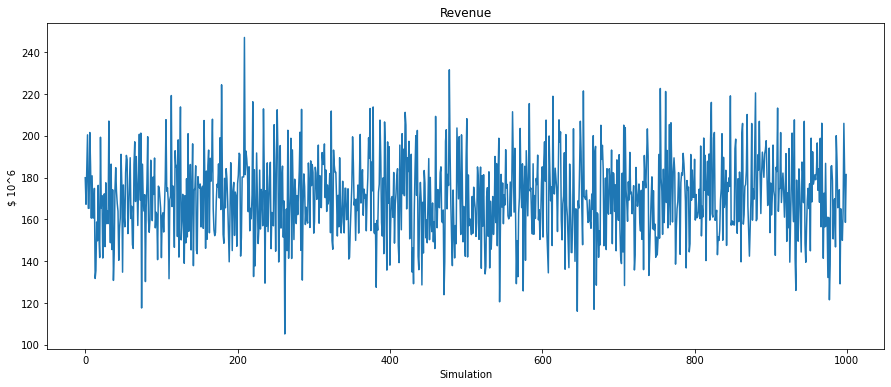

In [5]:
# Visualize the simulation
plt.figure(figsize=(15,6))
plt.plot(revenue)
plt.title('Revenue')
plt.xlabel('Simulation')
plt.ylabel('$ 10^6 ');
# plt.show()

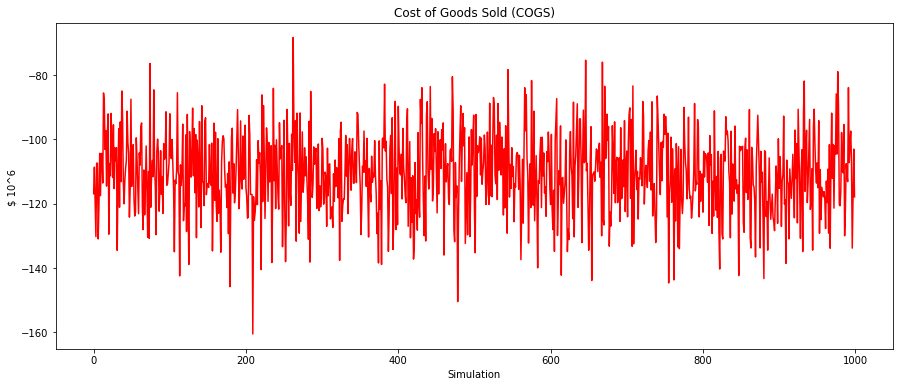

In [6]:
# Simulate the impact of Cost of Goods Sold (COGS)
np.random.seed(42)       # allow for reproducibility
COGS = - (revenue * np.random.normal(0.6, 0.1))    # estimate COGS ~ 60% of the revenues with a deviation of 10%; money spent, thus (-)

# Visualize
plt.figure(figsize=(15,6))
plt.plot(COGS, color = 'r')
plt.title('Cost of Goods Sold (COGS)')
plt.xlabel('Simulation')
plt.ylabel('$ 10^6 ');

In [7]:
# Determine the mean and standard deviation of COGS
COGS.mean(), COGS.std()

(-110.69533028252637, 12.717008811590498)

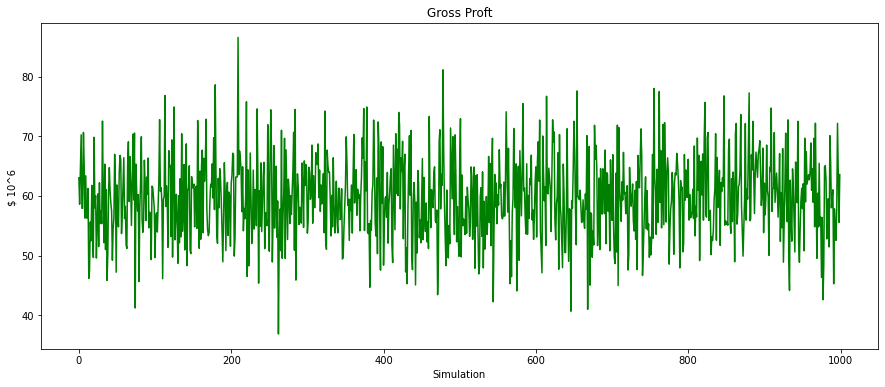

In [8]:
# Determine the Gross Proft
Gross_Profit = revenue + COGS
Gross_Profit

# Visualize Gross Proft
plt.figure(figsize = (15,6))
plt.plot(Gross_Profit, color='g')
plt.title('Gross Proft')
plt.xlabel('Simulation')
plt.ylabel('$ 10^6 ');

In [9]:
# Determine the maximum and minimum Gross Profit simulated
max(Gross_Profit), min(Gross_Profit)

(86.5502988057263, 36.84568740126723)

In [10]:
# Determine the mean and standard deviation of the Gross Profit simulated
Gross_Profit.mean(), Gross_Profit.std()

(59.69131083392014, 6.857515343356589)

Text(0, 0.5, '$ 10^6')

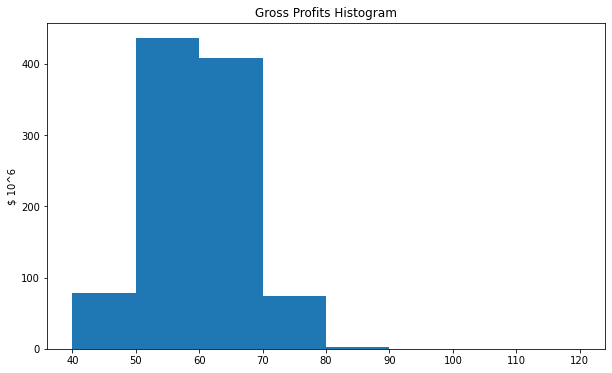

In [11]:
# Visualize Gross Profits in a histogram
plt.figure(figsize=(10,6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.title('Gross Profits Histogram')
plt.xlabel('')
plt.ylabel('$ 10^6')

Bins are too big and hard to see that the distribution is normal.

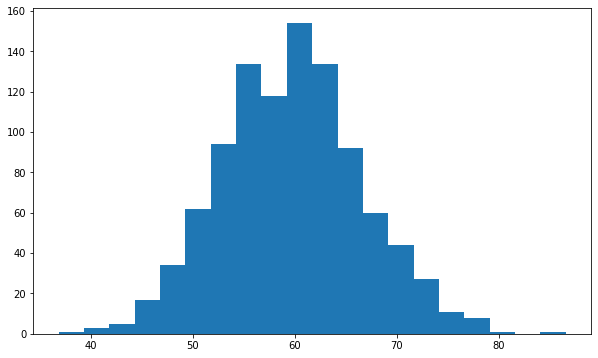

In [12]:
# Visualize a more normal distribution
plt.figure(figsize=(10,6));
plt.hist(Gross_Profit, bins = 20);

## Forecasting Stock Prices

>Price Today = Price Yesterday * e^r

>>Where,

>>r = log return of the share price between yesterday and today

❗ **Remember** e^ln(x) = x ---> ln(price today/price yesterday)

Therefore, Price Today = Price Yesterday * e^ln(Price Today / Price Yesterday)

###**Brownian Motion**
* Concept that allows one to model randomness (r)
* *Drift* - direction rates of return have been headed historically
> Drift = mu - 0.5 * variance

* *Volatility* - random variable 
> Random Variable = standard dev. * Z (Rand(0;1))

> Price Today = Price Yesterday * e^(mu - (0.5 * std) + (std * Z(Rand(0;1)))

## Monte Carlo - Forecasting Stock Prices

In [13]:
# Import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plot
from scipy.stats import norm
%matplotlib inline

In [14]:
# Source data from Yahoo Finance
ticker = 'PG'
PG_data = pd.DataFrame()
PG_data[ticker] = web.DataReader(ticker, data_source='yahoo', start = '2007-01-01')['Adj Close']

In [18]:
# Review data
PG_data[ticker]

Date
2007-01-03     41.366615
2007-01-04     41.052567
2007-01-05     40.700039
2007-01-08     40.789776
2007-01-09     40.687222
                 ...    
2022-02-14    156.740005
2022-02-15    156.820007
2022-02-16    158.009995
2022-02-17    159.820007
2022-02-18    159.899994
Name: PG, Length: 3811, dtype: float64

`pandas.pct_change()` obtains simple returns from a provided dataset

In [17]:
# Evaluate log rates of return
log_returns = np.log(1 + PG_data.pct_change())
log_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002517
...,...
2022-02-14,0.002875
2022-02-15,0.000510
2022-02-16,0.007560


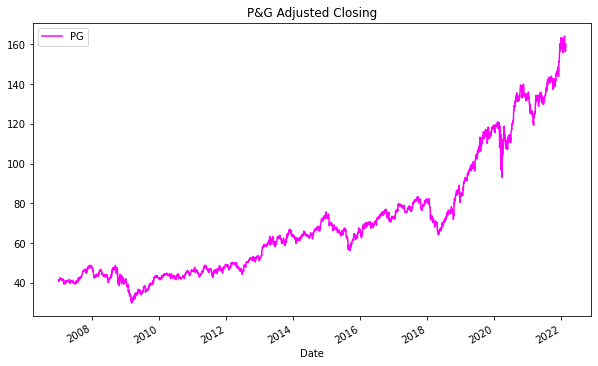

In [27]:
# Visualize the P&G data
PG_data.plot(figsize=(10,6), color ='magenta');
plt.title('P&G Adjusted Closing');

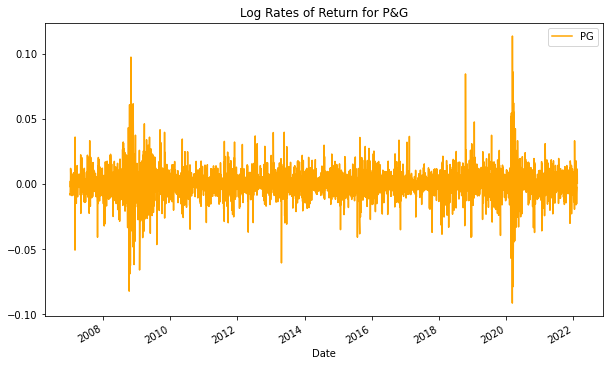

In [23]:
# Visualize the log rates of return for the P&G data
log_returns.plot(figsize=(10,6), color = 'orange');
plt.title('Log Rates of Return for P&G');

In [31]:
# Calculate Drift
mu = log_returns.mean()   # determine the mean of the log rates of return

var = log_returns.var()   # determine the variance of the log rates of return

drift = mu - (0.5 * var)

# Convert to an numpy array
np.array(drift)           # alternatively, drift.values

array([0.00028641])

In [33]:
# Calculate the standard deviation of the log rates of return
std = log_returns.std()

# Convert to an numpy array
np.array(std)

array([0.0117021])

####Brownian Motion

`Z` corresponds to the distance between the mean and the events, expressed as the number of standard deviations.

In [37]:
np.random.seed(42)                   # allow for reproducibility
Z = norm.ppf(np.random.rand(10,2))   # randomized having a shape of (10, 2)
Z

array([[-0.31985238,  1.65181933],
       [ 0.61885465,  0.24987627],
       [-1.01095644, -1.01105723],
       [-1.57106641,  1.1084959 ],
       [ 0.25623423,  0.54776271],
       [-2.04182404,  1.87947037],
       [ 0.9638628 , -0.79833136],
       [-0.90843217, -0.90246667],
       [-0.51223795,  0.06209505],
       [-0.17142444, -0.54979749]])

`np.exp` calculated e^()

In [40]:
# Set parameters
np.random.seed(42)     # allow for reproducibility
t_intervals = 1000     # number of simulations
iterations = 10


daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns, daily_returns.shape

(array([[0.99654943, 1.01980983, 1.00755672, ..., 1.01334642, 1.00329029,
         1.00671885],
        [0.97666924, 1.02253022, 1.01163277, ..., 1.00101356, 0.99828186,
         0.99387148],
        [1.00361811, 0.9876941 , 0.9939025 , ..., 1.00070428, 1.00302647,
         0.98080999],
        ...,
        [0.98286554, 1.02371924, 1.02058555, ..., 1.01152627, 1.01979783,
         1.00431111],
        [0.99590888, 1.00335756, 0.99456503, ..., 0.99394461, 0.9790614 ,
         1.01087174],
        [0.99882792, 0.99499333, 0.99943841, ..., 1.01935547, 0.99724935,
         0.99117584]]), (1000, 10))

>S_t = S_0 * daily_return_1

>S_t+1 = S_t * daily_return_t+1

>...

>S_t+999 = S_t+999 * daily_return_t+999

In [42]:
# Review first stock price is the Stock Price Today (last entry in the dataframe)
S_0 = PG_data.iloc[-1]
S_0

PG    159.899994
Name: 2022-02-18 00:00:00, dtype: float64

In [47]:
# Create a similar array to daily_returns but with zeroes
price_list = np.zeros_like(daily_returns)
price_list, price_list.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (1000, 10))

In [51]:
# Replace zeroes with stock prices, starting with day 0
price_list[0] = S_0

# Function to generate prices for the price list
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

price_list

array([[159.8999939 , 159.8999939 , 159.8999939 , ..., 159.8999939 ,
        159.8999939 , 159.8999939 ],
       [156.16940584, 163.50257545, 161.76007332, ..., 160.06206238,
        159.62526282, 158.92004286],
       [156.73444335, 161.49052896, 160.77374091, ..., 160.17479062,
        160.10836329, 155.87036614],
       ...,
       [ 98.21138635, 202.5675662 , 143.73328181, ..., 132.51817431,
        271.44453677, 132.76066778],
       [ 97.80959202, 203.2476998 , 142.95209535, ..., 131.71572574,
        265.76086875, 134.20400682],
       [ 97.69495137, 202.23010582, 142.87181439, ..., 134.26514592,
        265.02985393, 133.01976968]])

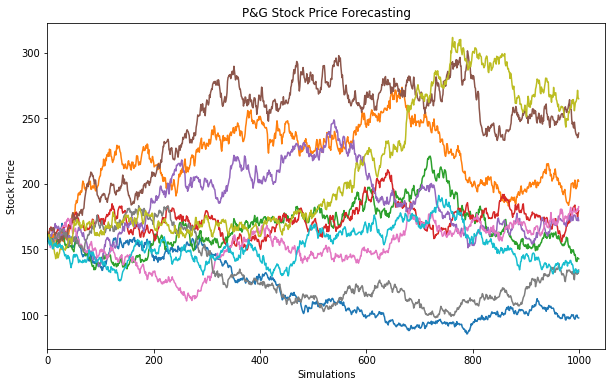

In [56]:
# Visualize the Stock Price Forecasting for P&G 
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.xlim(0)
plt.title('P&G Stock Price Forecasting')
plt.xlabel('Simulations')
plt.ylabel('Stock Price');

## Derivative Contracts

A financial instrument, whose price is derived based on the development of one or more underlying assets. Also known as a contract involving at least two parties describing how they wille exchange payments.

Examples:
* Stocks
* Bonds
* Interest Rates
* Commodities
* Exchange Rates

Companies (hedges,speculators, aribtrageurs) interested in buying these contracts were mostly concerned about protecting their investments. With time, financial institutions introduced a great deal of innovation to the scene, financial engineering was applied, and new types of derivatives appeared.

> Types of Correlation:
  * ***Forwards*** - used when two parties agree that one party will sell to the other an underlying asset at a future point of time; price of the asset is agreed beforehand
  * ***Futures*** - highly standardized forward constracts typically stipulated in a marketplace; differs from forwards by the level of standardization and participation of a clearing house - transaction goes through the marketplace and the counterparties do not know each other
  * ***Swaps*** - derivative instruments in which two parties agree to exchange cash flows, based on an underlying asset at a future point of time; underlying asset can be an interest rate, a stock price, a bond price, a commodity price, etc.
  * ***Options*** - enables its owner to buy or sell an underlying asset at a price (strike price); the owner of the option contract may buy or sell the asset as the given price, but also can decide not to do it if the asset's price isn't advantageous.
    * Call - Option to buy an asset
    * Put - Option to sell an asset
    * European Options -> exercised at maturity
    * American Options -> exercised at any time

### Black Scholes Formula for Option Pricing

Calculates the value of an option. One of the most widely used tools for derivative pricing.

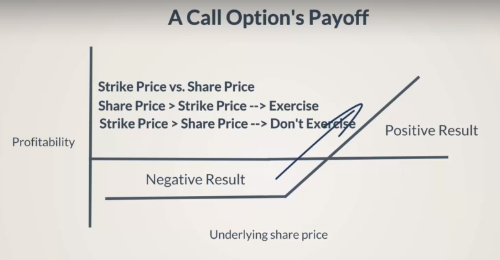

> C(S,t) = N(d_1)S - N(d_s)Ke^(-r(T-t))

>  where,
>  * d_1 = [1 / (s * sqrt(T - t))] *[ln(S/K) + (r + ((s^2)/2) * (T - t)]
>  * d_2 = d_1 - s * (sqrt(T-t)) 
>  * C = Call Premium
>  * t = time until option expires
>  * s = standard deviation
>  * N = normal distribution


***Types of Correlation:***
* *S* - stock's current market price
* *K* - strike price at whcih the option can be exercised; if exercised, can buy the stock at the strike price K
* *T-t* - the option's time until expiration
* *r* - Risk-Free Rate

Essentially, the Black Scholes formula calculates the value of a call by taking the difference between the amount one gets if one exercises the option minus the amount one has to pay if exercise the option.

## Monte Carlo - Black - Scholes - Merton

In [57]:
# import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm

Create functions to calculate d_1 and d_2


In [155]:
def d1(S, K, r, std, T):
  """
  Given the stock price (S), strike price (K), risk-free rate (r), standard
  deviation (std), and time horizone in years (T), outputs d_1
  """
  return (np.log(S/K) + (r + std ** 2 / 2) * T) / (std * np.sqrt(T))

def d2(S, K, r, std, T):
  """
  Given the stock price (S), strike price (K), risk-free rate (r), standard
  deviation (std), and time horizone in years (T), outputs d_2
  """
  return (np.log(S/K) + (r - std ** 2 / 2) * T) / (std * np.sqrt(T))

In [156]:
# Cumulative Distribution Function (cdf)
norm.cdf(0), norm.cdf(0.25), norm.cdf(0.75), norm.cdf(9)

(0.5, 0.5987063256829237, 0.7733726476231317, 1.0)

> C = SN(d_1) - Ke^(-rt)Nd_2

In [175]:
def BSM(S, K, r, std, T):
  """
  Given the stock price (S), strike price (K), risk-free rate (r), standard
  deviation (std), and time horizone in years (T), solves the Black Scholes Merton formula
  """
  return (S * norm.cdf(d1(S, K, r, std, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, std, T)))

In [176]:
# Source the P&G data 
ticker = 'PG'
PG_data = pd.DataFrame()
PG_data[ticker] = web.DataReader(ticker, data_source ='yahoo', start='2012-1-1', end='2022-02-18')['Adj Close']

In [177]:
# Last day of P&G stock price
S = PG_data.iloc[-1]
S

PG    159.899994
Name: 2022-02-18 00:00:00, dtype: float64

In [178]:
# Calculate the log rates of return
log_returns = np.log(1 + PG_data.pct_change())
log_returns

,PG
Date,
2012-01-03,NaN
2012-01-04,-0.000449
2012-01-05,-0.004201
2012-01-06,-0.002408
2012-01-09,0.004211
...,...
2022-02-14,0.002875
2022-02-15,0.000510
2022-02-16,0.007560


In [179]:
# Calculate the standard deviation of the log rates of return
std = log_returns.std() * 250 ** 0.5 
std

PG    0.173622
dtype: float64

In [180]:
# Set parameters
r, K, T = 0.025, 110.0, 1
r, K, T

(0.025, 110.0, 1)

In [181]:
# Calculate d_1, d_2, and Black Scholes Merton formula
print('d_1 = ', d1(S, K, r, std, T))
print('d_2 = ', d2(S, K, r, std, T))
print('Black Scholes Merton Formula = ', BSM(S, K, r, std, T))

d_1 =  PG    2.385297
dtype: float64
d_2 =  PG    2.211675
dtype: float64
Black Scholes Merton Formula =  PG    52.699283
Name: 2022-02-18 00:00:00, dtype: float64


## Euler Discretization

In [139]:
# Import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
# Source data
ticker = 'PG'
PG_data = pd.DataFrame()
PG_data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2012-1-1', end='2022-02-18')['Adj Close']
PG_data

,PG
Date,
2012-01-03,49.150509
2012-01-04,49.128448
2012-01-05,48.922520
2012-01-06,48.804829
2012-01-09,49.010750
...,...
2022-02-14,156.740005
2022-02-15,156.820007
2022-02-16,158.009995


In [183]:
# Calculate the log rates of return
log_returns = np.log(1 + PG_data.pct_change())
log_returns

,PG
Date,
2012-01-03,NaN
2012-01-04,-0.000449
2012-01-05,-0.004200
2012-01-06,-0.002409
2012-01-09,0.004210
...,...
2022-02-14,0.002875
2022-02-15,0.000510
2022-02-16,0.007560


> S_t = S_t-1 * e^(r - 0.5 * (std^2) * delta_t + std * sqrt(delta_t) * Z_t)

In [184]:
# Set risk free rate (r) and calculated standard deviation (std)
r, std = 0.025, log_returns.std() * 250 ** 0.5
r, std

(0.025, PG    0.173622
 dtype: float64)

In [185]:
# Convert standard deviation into an np.array
std = std.values
std

array([0.17362229])

In [186]:
# Set parameters
T, t_intervals, delta_t, iterations = 1.0, 250, T/t_intervals, 1000   # T = 1 year
T, t_intervals, delta_t, iterations

(1.0, 250, 0.004, 1000)

In [187]:
# Set parameters
np.random.seed(42)     # allows for reproducibility
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S_0 = PG_data.iloc[-1]
S[0] = S_0
S

array([[159.8999939, 159.8999939, 159.8999939, ..., 159.8999939,
        159.8999939, 159.8999939],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [188]:
# Replace S matrix of zeroes with stock prices
for t in range(1, t_intervals + 1):
  S[t] = S[t-1] * np.exp((r - 0.5 * (std**2)) * delta_t + std * (delta_t**0.5) * Z[t])

In [189]:
S, S.shape

(array([[159.8999939 , 159.8999939 , 159.8999939 , ..., 159.8999939 ,
         159.8999939 , 159.8999939 ],
        [162.38245524, 161.53818348, 160.01108334, ..., 158.36532848,
         159.62026974, 158.60369983],
        [161.18940062, 161.28844074, 158.63109663, ..., 156.22678608,
         160.21344029, 158.33981845],
        ...,
        [211.93315125, 166.59730726, 164.30745285, ..., 146.86649108,
         174.96629484, 146.89533062],
        [211.6380415 , 167.3832763 , 168.40325897, ..., 147.09558983,
         172.24998903, 143.586161  ],
        [212.93914045, 170.64464322, 167.5771215 , ..., 146.93650757,
         178.70975536, 142.51647435]]), (251, 1000))

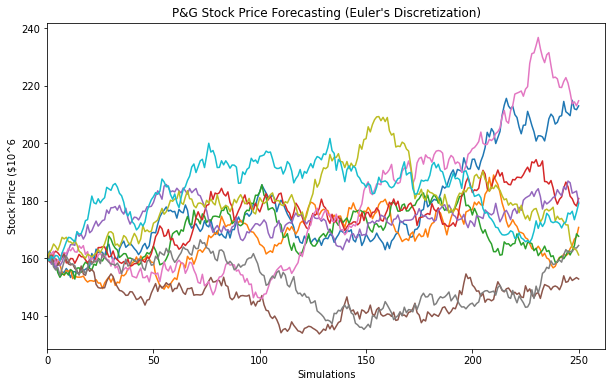

In [190]:
# Visualize
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);
plt.title("P&G Stock Price Forecasting (Euler's Discretization)")
plt.xlabel('Simulations')
plt.ylabel('Stock Price ($10^6')
plt.xlim(0);

**Call Option**
* Buy if ...S - K > 0
* Do Not Buy if ...S - K < 0

`np.maximum()` - creates an array that contains either 0s or the numbers equal to the differences

In [191]:
p = np.maximum(S[-1] - 110, 0)
p, p.shape

(array([102.93914045,  60.64464322,  57.5771215 ,  70.71470022,
         69.35654577,  42.70207462, 104.72235541,  54.37109016,
         51.08360478,  68.94829639,  24.57029807,  72.02516327,
         60.96282357,  50.44874901,  47.10591326,  90.70582761,
         25.25287268,  49.76144139,  85.90742292,  84.69579618,
        103.7402293 ,  45.60079071,  37.09115966,  90.41636333,
        130.39132467,  34.06126602,  66.07448611,  66.28308984,
         17.90226529,  30.88433488,  84.94687856, 101.40187321,
         58.91772234,  14.62993957,  14.44399599, 116.94901024,
          9.2859527 ,  51.85772862,  60.51136548,  69.99905856,
         47.40891496,   9.34946252,  79.91405722,  26.04083154,
        104.03375844,  33.01622724, 107.90668414,  62.2217109 ,
         16.38994857,  66.08384257,  46.73441019,   3.96403521,
         67.83114473,  23.92585274,  77.65223775,  33.7672854 ,
        125.19483698,  25.71008583,  51.41634056,  47.98793205,
         76.20916686,  59.10283306,  68.

Call Premium
> C = (e^(-r * T) * SUM(p_i)) / iterations

In [192]:
# Calculate Call Premium
C = np.exp(-r * T) * np.sum(p) / iterations
C

52.82519097968739